In [1]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
from IPython.display import display, Markdown

display(HTML("<style>.container { width:65% !important;margin-left:15% }</style>"))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


class LinearReg():

    def __init__(self, x, y):
        from sklearn.linear_model import LinearRegression

        self.lr_model = LinearRegression()

        self.x = x.reshape(-1, 1)
        self.y = y.reshape(-1, 1)

        self.lr_model.fit(self.x, self.y)

        self.rr = self.lr_model.score(self.x, self.y)

    def get_fitted_line(self):
        return [self.x, self.lr_model.predict(self.x)]

    def get_coefficients(self):
        return self.lr_model.coef_[0, 0], self.lr_model.intercept_[0]

    def get_score(self, x=0, y=0):
        if x == 0 or y == 0:
            return self.rr
        else:
            return self.lr_model.score(x, y)

    def print_coefficients(self):
        print('Gain: {0:1.2f}, Bias: {1:1.2f}, , r^2: {2:1.2f}'.format(self.lr_model.coef_[0, 0], self.lr_model.intercept_[0], self.rr))
        return ('Gain: {0:1.2f},\nBias: {1:1.2f},\n' + r'$r^2$: {2:1.2f}').format(self.lr_model.coef_[0, 0], self.lr_model.intercept_[0], self.rr)





In [3]:
import seaborn as sns
import matplotlib as mpl
    # 21 defines the number of sound types

plt.style.use('seaborn-whitegrid')

drawing_size = 15
box_frame = True
    
mpl.rcParams['grid.linestyle'] = ':'

mpl.rcParams['font.size'] = drawing_size
mpl.rcParams['font.style'] = 'normal'
# mpl.rcParams['font.family'] = ['Symbol']

mpl.rcParams['figure.titlesize'] = int(drawing_size * 1.3)

mpl.rcParams['lines.linewidth'] = int(drawing_size / 5)

mpl.rcParams['axes.labelsize'] = drawing_size
mpl.rcParams['axes.titlesize'] = int(drawing_size * 1.3)
mpl.rcParams['xtick.labelsize'] = int(drawing_size * 1)
mpl.rcParams['ytick.labelsize'] = int(drawing_size * 1)

if box_frame:
    mpl.rcParams['legend.fancybox'] = True
    mpl.rcParams['legend.fontsize'] = int(drawing_size * 1)
    mpl.rcParams['legend.frameon'] = True
    mpl.rcParams['legend.framealpha'] = 0.5
else:
    mpl.rcParams['legend.fancybox'] = False
    mpl.rcParams['legend.fontsize'] = int(drawing_size * 1)
    mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.facecolor'] = 'inherit'
mpl.rcParams['legend.edgecolor'] = '0.8'

mpl.rcParams['figure.figsize'] = [20.0, 10.0]
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['savefig.dpi'] = 400
mpl.rcParams['image.cmap'] = 'viridis'

## Condition: Monaural

/home/oesst/ownCloud/PhD/Code/Python/vertical_localization_exp/results/userid_09_date_19.01.2021_time_14.13.csv
/home/oesst/ownCloud/PhD/Code/Python/vertical_localization_exp/results/userid_06_date_03.12.2020_time_12.07.csv
/home/oesst/ownCloud/PhD/Code/Python/vertical_localization_exp/results/userid_08_date_11.12.2020_time_11.41.csv
/home/oesst/ownCloud/PhD/Code/Python/vertical_localization_exp/results/userid_07_date_03.12.2020_time_13.14.csv


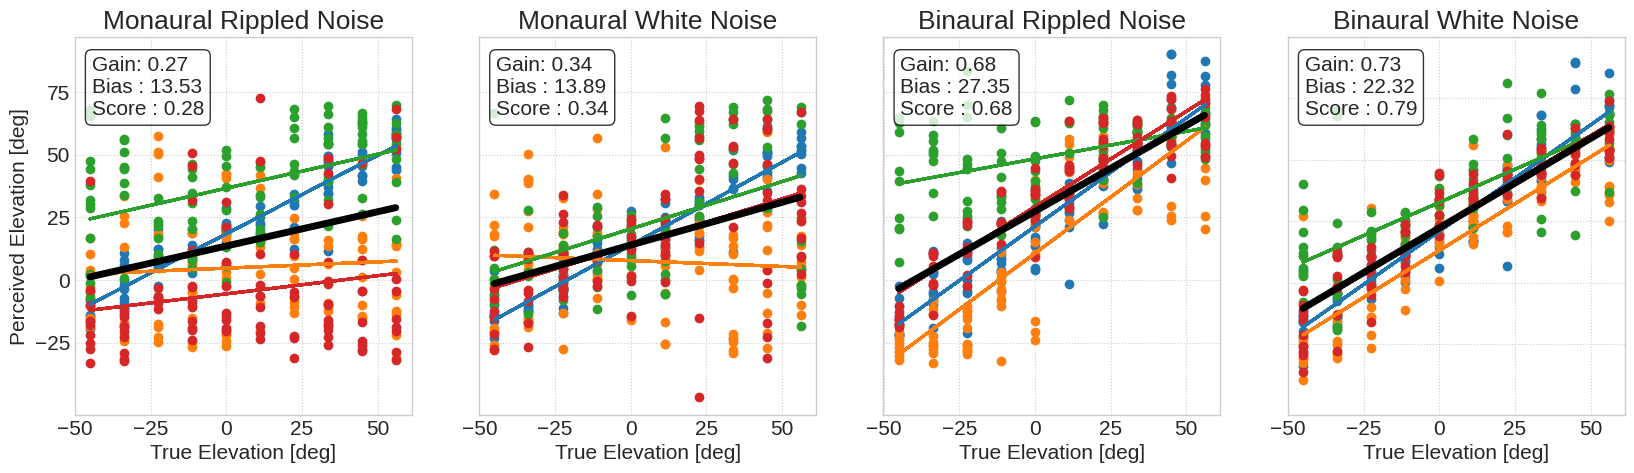

In [9]:
from pathlib import Path

# ROOT = parents[2]
# set the path to the sound files
SOUND_FILES = Path('.').resolve() / 'results'
# create a list of the sound files
SOUND_FILES = list(SOUND_FILES.glob('**/*.csv'))

dfs_mono_first = []

for i in SOUND_FILES:
    
    
    if np.any([ "userid_"+k in str(i.resolve()) for k in ["99","98","00","01","02","03","04","05"]] ):
#     if np.any([ "userid_"+k in str(i.resolve()) for k in ["99","98","00","01","06","07","08","09"]] ):
        continue
    
    
#     if "_99" in str(i.resolve()) or "_98" in str(i.resolve()) or "_01" in str(i.resolve()) or "_00" in str(i.resolve()):
#         continue
    
    print(i)
    df = pd.read_csv(i.resolve(),)
    # aligne speakers on circle in degress
    
    # distance between speakers: 11.25 deg; offset of -45 deg, since only the lower 10 speakers are used
    df.line_number = ((df.line_number.values   * 11.25)) -45
    # mirror user_estimtaes and then bring them in range -45deg - 90deg
    df.user_estimate = abs((df.user_estimate-360))-270
    
    
    
#     df.line_number = 135 - (df.line_number.values   * 12.25)
    # remove rows with reaction times larger than 5s -> probably start trail
    df = df.drop(df[df.reaction_time > 5].index)
    
#     if "userid_02" in str(i.resolve()):
#         dfs.append(df)
    
    dfs_mono_first.append(df)

    # TODO change the calucation of the user estimate
# use real values for max and deg



conditions = ['mono','bin']

noise_types = ['white','rippled']


fig = plt.figure(figsize=(20,5))
axes = fig.subplots(1,4,squeeze=False,sharex=True,sharey=True)

lin_reg_results = np.zeros((len(dfs_mono_first),4,3))


        
for i_condition,condition in enumerate(conditions):

    for i_noise,noise in enumerate(noise_types[::-1]):
        
        for i_df,df in enumerate(dfs_mono_first):
            
            ax_num = ( i_condition * len(conditions)) + i_noise
                    
            ax = axes[0,ax_num]

            
#             if i_df == 0:
#                 ax.set_title(condition+' '+noise)
#                 print(condition,noise,ax_num)

                
#             ax.set_ylabel(user)
        
            df_ = df[ (df['condition'] == condition) & (df['sound_type'] == noise)]

            perc = df_.user_estimate
            outp = df_.line_number
            
#             print(perc.values)
            
            lr = LinearReg(outp.values,perc.values)            
            g,b = lr.get_coefficients()
            s = lr.get_score()
            lin_reg_results[i_df,ax_num, :] = [g,b,s] 

            [x,y] = lr.get_fitted_line()
            ax.plot(x,y,linewidth=2)
            ax.scatter(outp,perc)

            
means = lin_reg_results.mean(0)
x = np.arange(-45,56.25)

ax = axes[0,0]
ax.set_title('Monaural Rippled Noise')
ax.plot(x,x*means[0,0]+means[0,1],color='black',linewidth=5)
text_str = 'Gain: {0:1.2f}\nBias : {1:1.2f}\nScore : {2:1.2f}'.format(means[0,0],means[0,1],means[0,2])
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
# place a text box in upper left in axes coords
ax.text(0.05, 0.95, text_str, transform=ax.transAxes, verticalalignment='top', bbox=props)
ax.set_ylabel('Perceived Elevation [deg]')
ax.set_xlabel('True Elevation [deg]')
ax.set_yticks([-25,0,25,50,75,100])


ax = axes[0,1]
ax.set_title('Monaural White Noise')
ax.plot(x,x*means[1,0]+means[1,1],color='black',linewidth=5)
text_str = 'Gain: {0:1.2f}\nBias : {1:1.2f}\nScore : {2:1.2f}'.format(means[1,0],means[1,1],means[1,2])
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
# place a text box in upper left in axes coords
ax.text(0.05, 0.95, text_str, transform=ax.transAxes, verticalalignment='top', bbox=props)
ax.set_xlabel('True Elevation [deg]')
ax.set_yticks([-25,0,25,50,75,100])

ax = axes[0,2]
ax.set_title('Binaural Rippled Noise')
ax.plot(x,x*means[2,0]+means[2,1],color='black',linewidth=5)
text_str = 'Gain: {0:1.2f}\nBias : {1:1.2f}\nScore : {2:1.2f}'.format(means[2,0],means[2,1],means[2,2])
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
# place a text box in upper left in axes coords
ax.text(0.05, 0.95, text_str, transform=ax.transAxes, verticalalignment='top', bbox=props)
ax.set_xlabel('True Elevation [deg]')
ax.set_yticks([-25,0,25,50,75,100])

ax = axes[0,3]
ax.set_title('Binaural White Noise')
ax.plot(x,x*means[3,0]+means[3,1],color='black',linewidth=5)
text_str = 'Gain: {0:1.2f}\nBias : {1:1.2f}\nScore : {2:1.2f}'.format(means[3,0],means[3,1],means[3,2])
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
# place a text box in upper left in axes coords
ax.text(0.05, 0.95, text_str, transform=ax.transAxes, verticalalignment='top', bbox=props)
ax.set_xlabel('True Elevation [deg]')
ax.set_yticks([-25,0,25,50,75,100])



# plt.tight_layout()

plt.savefig('behavioral_results.png', dpi=300)
plt.savefig('behavioral_results.pdf', dpi=300)
plt.savefig('behavioral_results.svg', dpi=300)

plt.show()



# print('Mono Rippled Mean Gain: {0:1.3f},  Bias : {1:1.3f},  Score : {1:1.3f}'.format(means[0,0],means[0,1],means[0,2]))
# print('Mono White N Mean Gain: {0:1.3f},  Bias : {1:1.3f},  Score : {1:1.3f}'.format(means[1,0],means[1,1],means[1,2]))
# print('Bina Rippled Mean Gain: {0:1.3f},  Bias : {1:1.3f},  Score : {1:1.3f}'.format(means[2,0],means[2,1],means[2,2]))
# print('Bina White N Mean Gain: {0:1.3f},  Bias : {1:1.3f},  Score : {1:1.3f}'.format(means[3,0],means[3,1],means[3,2]))



## Condition: Binaural

/home/oesst/ownCloud/PhD/Code/Python/vertical_localization_exp/results/userid_05_date_27.11.2020_time_14.44.csv
/home/oesst/ownCloud/PhD/Code/Python/vertical_localization_exp/results/userid_04_date_27.11.2020_time_08.38.csv
/home/oesst/ownCloud/PhD/Code/Python/vertical_localization_exp/results/userid_03_date_26.11.2020_time_13.31.csv
/home/oesst/ownCloud/PhD/Code/Python/vertical_localization_exp/results/userid_02_date_24.11.2020_time_16.01.csv


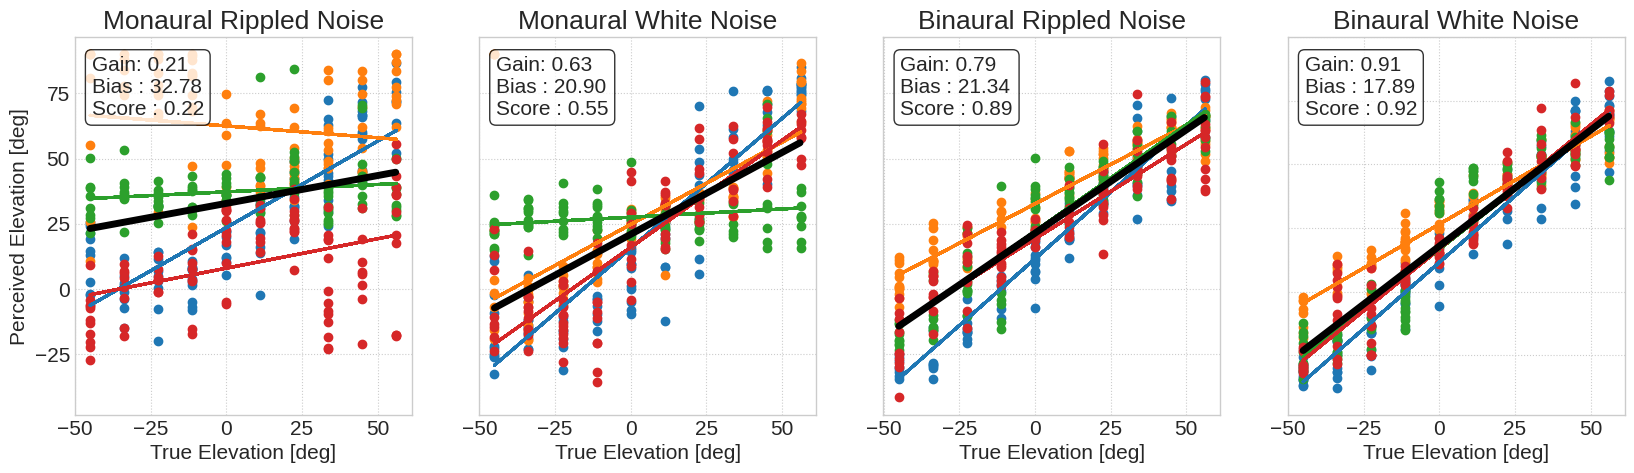

In [10]:
from pathlib import Path

# ROOT = parents[2]
# set the path to the sound files
SOUND_FILES = Path('.').resolve() / 'results'
# create a list of the sound files
SOUND_FILES = list(SOUND_FILES.glob('**/*.csv'))

dfs_bin_first = []

for i in SOUND_FILES:
    
    
#     if np.any([ "userid_"+k in str(i.resolve()) for k in ["99","98","00","01","02","03","04","05"]] ):
    if np.any([ "userid_"+k in str(i.resolve()) for k in ["99","98","00","01","06","07","08","09"]] ):
        continue
    
    
#     if "_99" in str(i.resolve()) or "_98" in str(i.resolve()) or "_01" in str(i.resolve()) or "_00" in str(i.resolve()):
#         continue
    
    print(i)
    df = pd.read_csv(i.resolve(),)
    # aligne speakers on circle in degress
    
    # distance between speakers: 11.25 deg; offset of -45 deg, since only the lower 10 speakers are used
    df.line_number = ((df.line_number.values   * 11.25)) -45
    # mirror user_estimtaes and then bring them in range -45deg - 90deg
    df.user_estimate = abs((df.user_estimate-360))-270
    
    
    
#     df.line_number = 135 - (df.line_number.values   * 12.25)
    # remove rows with reaction times larger than 5s -> probably start trail
    df = df.drop(df[df.reaction_time > 5].index)
    
#     if "userid_02" in str(i.resolve()):
#         dfs.append(df)
    
    dfs_bin_first.append(df)

    # TODO change the calucation of the user estimate
# use real values for max and deg

conditions = ['mono','bin']

noise_types = ['white','rippled']


fig = plt.figure(figsize=(20,5))
axes = fig.subplots(1,4,squeeze=False,sharex=True,sharey=True)

lin_reg_results = np.zeros((len(dfs_bin_first),4,3))


        
for i_condition,condition in enumerate(conditions):

    for i_noise,noise in enumerate(noise_types[::-1]):
        
        for i_df,df in enumerate(dfs_bin_first):
            
            ax_num = ( i_condition * len(conditions)) + i_noise
                    
            ax = axes[0,ax_num]

            
#             if i_df == 0:
#                 ax.set_title(condition+' '+noise)
#                 print(condition,noise,ax_num)

                
#             ax.set_ylabel(user)
        
            df_ = df[ (df['condition'] == condition) & (df['sound_type'] == noise)]

            perc = df_.user_estimate
            outp = df_.line_number
            
#             print(perc.values)
            
            lr = LinearReg(outp.values,perc.values)            
            g,b = lr.get_coefficients()
            s = lr.get_score()
            lin_reg_results[i_df,ax_num, :] = [g,b,s] 

            [x,y] = lr.get_fitted_line()
            ax.plot(x,y,linewidth=2)
            ax.scatter(outp,perc)

            
means = lin_reg_results.mean(0)
x = np.arange(-45,56.25)

ax = axes[0,0]
ax.set_title('Monaural Rippled Noise')
ax.plot(x,x*means[0,0]+means[0,1],color='black',linewidth=5)
text_str = 'Gain: {0:1.2f}\nBias : {1:1.2f}\nScore : {2:1.2f}'.format(means[0,0],means[0,1],means[0,2])
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
# place a text box in upper left in axes coords
ax.text(0.05, 0.95, text_str, transform=ax.transAxes, verticalalignment='top', bbox=props)
ax.set_ylabel('Perceived Elevation [deg]')
ax.set_xlabel('True Elevation [deg]')
ax.set_yticks([-25,0,25,50,75,100])


ax = axes[0,1]
ax.set_title('Monaural White Noise')
ax.plot(x,x*means[1,0]+means[1,1],color='black',linewidth=5)
text_str = 'Gain: {0:1.2f}\nBias : {1:1.2f}\nScore : {2:1.2f}'.format(means[1,0],means[1,1],means[1,2])
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
# place a text box in upper left in axes coords
ax.text(0.05, 0.95, text_str, transform=ax.transAxes, verticalalignment='top', bbox=props)
ax.set_xlabel('True Elevation [deg]')
ax.set_yticks([-25,0,25,50,75,100])

ax = axes[0,2]
ax.set_title('Binaural Rippled Noise')
ax.plot(x,x*means[2,0]+means[2,1],color='black',linewidth=5)
text_str = 'Gain: {0:1.2f}\nBias : {1:1.2f}\nScore : {2:1.2f}'.format(means[2,0],means[2,1],means[2,2])
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
# place a text box in upper left in axes coords
ax.text(0.05, 0.95, text_str, transform=ax.transAxes, verticalalignment='top', bbox=props)
ax.set_xlabel('True Elevation [deg]')
ax.set_yticks([-25,0,25,50,75,100])

ax = axes[0,3]
ax.set_title('Binaural White Noise')
ax.plot(x,x*means[3,0]+means[3,1],color='black',linewidth=5)
text_str = 'Gain: {0:1.2f}\nBias : {1:1.2f}\nScore : {2:1.2f}'.format(means[3,0],means[3,1],means[3,2])
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
# place a text box in upper left in axes coords
ax.text(0.05, 0.95, text_str, transform=ax.transAxes, verticalalignment='top', bbox=props)
ax.set_xlabel('True Elevation [deg]')
ax.set_yticks([-25,0,25,50,75,100])



# plt.tight_layout()

plt.savefig('behavioral_results.png', dpi=300)
plt.savefig('behavioral_results.pdf', dpi=300)
plt.savefig('behavioral_results.svg', dpi=300)

plt.show()



# print('Mono Rippled Mean Gain: {0:1.3f},  Bias : {1:1.3f},  Score : {1:1.3f}'.format(means[0,0],means[0,1],means[0,2]))
# print('Mono White N Mean Gain: {0:1.3f},  Bias : {1:1.3f},  Score : {1:1.3f}'.format(means[1,0],means[1,1],means[1,2]))
# print('Bina Rippled Mean Gain: {0:1.3f},  Bias : {1:1.3f},  Score : {1:1.3f}'.format(means[2,0],means[2,1],means[2,2]))
# print('Bina White N Mean Gain: {0:1.3f},  Bias : {1:1.3f},  Score : {1:1.3f}'.format(means[3,0],means[3,1],means[3,2]))

